In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## Medio sumador (half-adder)

Este circuito cuantico se encargara de sumar dos registros llamados $A$ y $B$, estos registros son de 1 bit (1 qubit), y necesitaremos un registro para almacenar la suma y otro para el acarreo (carry), es decir, nuestro circuito cuantico tendra en total 4 qubits.

Se usaran solo compuertas $CNOT$ y $Toffoli$ ($CCNOT$), y algunas compuertas extra para representar los valores de entrada al sumador.

La tabla de verdad que sigue este sumador es el siguiente:

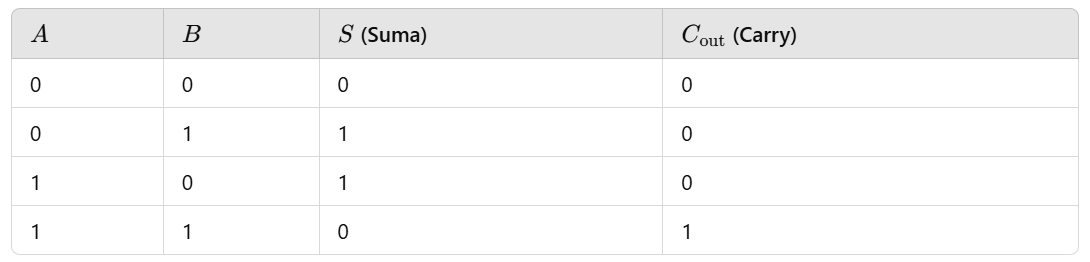

In [ ]:
# Creamos un circuito para 4 qubits (A,B,S,C) y 4 bits clásicos:
q_a = QuantumRegister(1, name='q_a')
q_b = QuantumRegister(1, name='q_b')
q_s = QuantumRegister(1, name='q_s')
q_c = QuantumRegister(1, name='q_c')
c_s = ClassicalRegister(1, name='c_s')
c_c = ClassicalRegister(1, name='c_c')

qc = QuantumCircuit(q_a, q_b, q_s, q_c, c_s, c_c)

# EJEMPLO: Ajustar A=1, B=1 (puedes cambiarlos a tu gusto)
qc.x(0)  # A <- 1
#qc.x(1)  # B <- 1

# (1) Primer CNOT: control = q0 (A), target = q2 (S)
qc.cx(0, 2)

# (2) Segundo CNOT: control = q1 (B), target = q2 (S)
qc.cx(1, 2)

# (3) Toffoli: controles = q0(A), q1(B), target = q3(C)
qc.ccx(0, 1, 3)

# Medimos los 4 qubits
qc.measure([2,3], [1,0])

print("Circuito:\n", qc.draw())

# Creamos el simulador AerSimulator
sim = AerSimulator()

# Transpilamos el circuito para el backend
compiled_circuit = transpile(qc, sim)

# Ejecutamos la simulación con 1024 'shots'
job = sim.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(compiled_circuit)

Circuito:
        ┌───┐                     
  q_a: ┤ X ├──■─────────■────────
       └───┘  │         │        
  q_b: ───────┼────■────■────────
            ┌─┴─┐┌─┴─┐  │  ┌─┐   
  q_s: ─────┤ X ├┤ X ├──┼──┤M├───
            └───┘└───┘┌─┴─┐└╥┘┌─┐
  q_c: ───────────────┤ X ├─╫─┤M├
                      └───┘ ║ └╥┘
c_s: 1/═════════════════════╬══╩═
                            ║  0 
c_c: 1/═════════════════════╩════
                            0    


Conteos de medición: {'1 0': 1024}


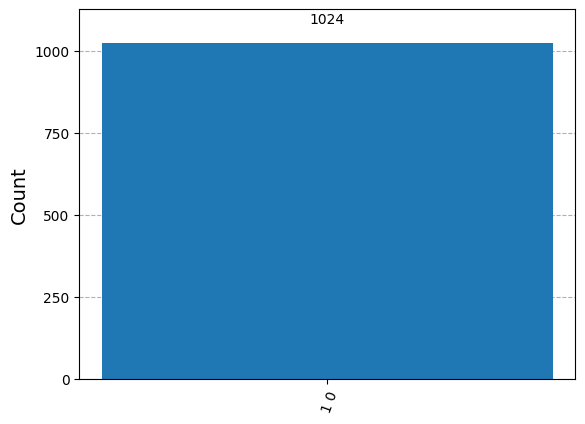

In [ ]:
print("Conteos de medición:", counts)
plot_histogram(counts)

## Multiplicador modular



A continuación mostraremos un ejemplo muy sencillo de multiplicación modular en un circuito cuántico. Queremos que, dados 2 qubits de entrada $|x_{1}, x_{0}\rangle$, el circuito produzca en un registro de salida $|s_{1}, s_{0}\rangle$ el resultado:

$ f(x) = (3 \times x) \ mod \ 4 $,

sin alterar el valor original de $x$.

In [ ]:
# Creamos un circuito con 4 qubits y 4 bits clásicos
#  - q0 = x0, q1 = x1, q2 = out0, q3 = out1
qc = QuantumCircuit(4, 4)

# (Opcional) preparamos x en algún estado.
#   Ej: supongamos x=3 => (x1=1, x0=1):
qc.h(0)  # x0=1
qc.h(1)  # x1=1

# (También podríamos poner Hadamard para ver superposición)

# 1) out0 = x0
qc.cx(0, 2)

# 2) out1 = x1 XOR x0
qc.cx(1, 3)
qc.cx(0, 3)

# Medimos [x0, x1, out0, out1] => bits clásicos c0..c3
qc.measure([0,1,2,3], [0,1,2,3])

print("Circuito:")
print(qc.draw())

# Ejecutar en simulador
sim = AerSimulator()
compiled = transpile(qc, sim)
job = sim.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts(compiled)

Circuito:
     ┌───┐                     ┌─┐   
q_0: ┤ H ├──■─────────■────────┤M├───
     ├───┤  │         │  ┌─┐   └╥┘   
q_1: ┤ H ├──┼────■────┼──┤M├────╫────
     └───┘┌─┴─┐  │    │  └╥┘┌─┐ ║    
q_2: ─────┤ X ├──┼────┼───╫─┤M├─╫────
          └───┘┌─┴─┐┌─┴─┐ ║ └╥┘ ║ ┌─┐
q_3: ──────────┤ X ├┤ X ├─╫──╫──╫─┤M├
               └───┘└───┘ ║  ║  ║ └╥┘
c: 4/═════════════════════╩══╩══╩══╩═
                          1  2  0  3 


Resultados de medición:
{'1101': 259, '0111': 258, '1010': 265, '0000': 242}


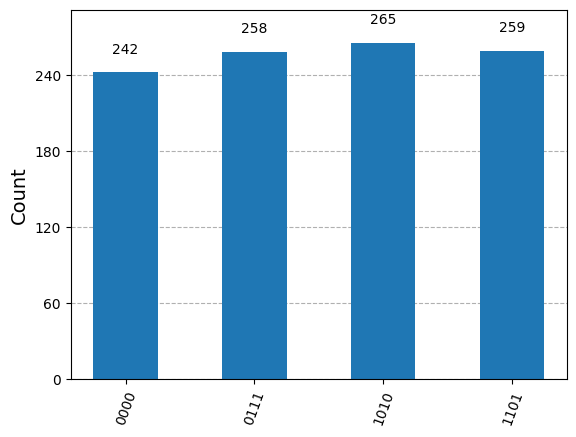

In [ ]:
print("Resultados de medición:")
print(counts)
plot_histogram(counts)